1/100: lat=36.233739852276, lon=-143.29092132395, t_g=2025-07-04 15:03:15
2/100: lat=35.775253230963, lon=-142.66517208997, t_g=2025-07-04 15:03:26
3/100: lat=35.270828728618, lon=-141.99129834568, t_g=2025-07-04 15:03:38
4/100: lat=34.719502845389, lon=-141.27135102619, t_g=2025-07-04 15:03:51
5/100: lat=34.249163925484, lon=-140.67016985507, t_g=2025-07-04 15:04:02
6/100: lat=33.732184696951, lon=-140.02251400173, t_g=2025-07-04 15:04:14
7/100: lat=33.211270918889, lon=-139.38319108212, t_g=2025-07-04 15:04:26
8/100: lat=32.686546702187, lon=-138.75200498953, t_g=2025-07-04 15:04:38
9/100: lat=32.158125999541, lon=-138.12875247771, t_g=2025-07-04 15:04:50
10/100: lat=31.670592098132, lon=-137.56423998009, t_g=2025-07-04 15:05:01
11/100: lat=31.135408837001, lon=-136.95564924804, t_g=2025-07-04 15:05:13
12/100: lat=30.596854437454, lon=-136.3544213528, t_g=2025-07-04 15:05:25
13/100: lat=30.100311707902, lon=-135.80960334, t_g=2025-07-04 15:05:36
14/100: lat=29.555593059744, lon=-135.

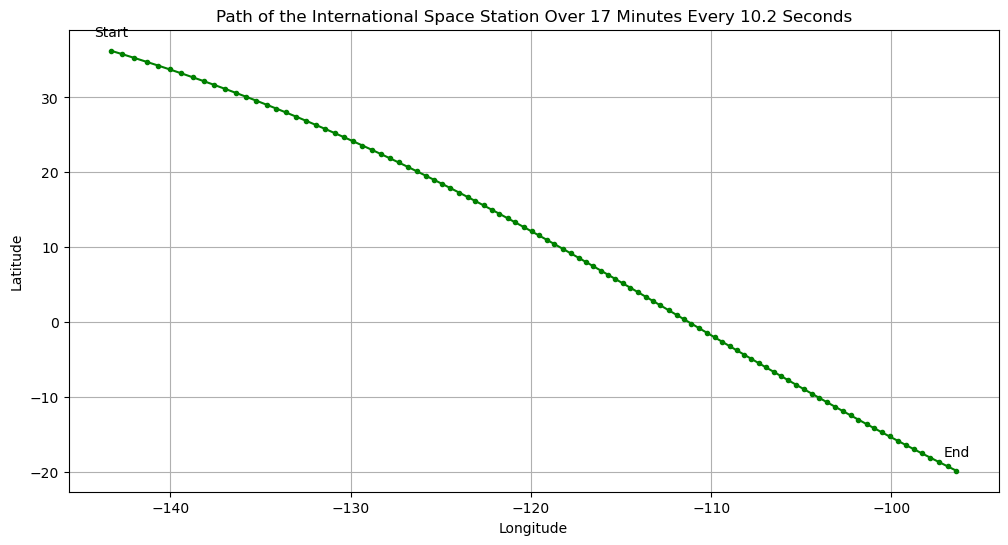

In [6]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime, UTC

lon, lat, t_g = [], [], []

for i in range(1, 101):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    dictionary = response.json()

    longitude = float(dictionary["longitude"])
    latitude = float(dictionary["latitude"])
    timestamp = dictionary["timestamp"]

    readable_timestamp = datetime.fromtimestamp(timestamp, UTC).strftime('%Y-%m-%d %H:%M:%S')

    lon.append(longitude)
    lat.append(latitude)
    t_g.append(readable_timestamp)

    print(f"{i}/100: lat={latitude}, lon={longitude}, t_g={readable_timestamp}")
    time.sleep((17 * 60) / 100)

plt.figure(figsize=(12, 6))
plt.plot(lon, lat, marker='o', linestyle='-', color='green', markersize=3)

plt.annotate("Start", (lon[0], lat[0]), textcoords="offset points", xytext=(0,10), ha='center', color='black')
plt.annotate("End", (lon[-1], lat[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

plt.title("Path of the International Space Station Over 17 Minutes Every 10.2 Seconds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()